## M_Ersevim - DSC630 - Wk 3

This week's exercise is to investigate the potential drivers (or at least correlations) between certain variables and baseball game attendance. Ostensibly, management would manipulate the variables that they could in order to increase attendance without
spending more than they gain to do so.

In [13]:
import pandas as pd              #Importing the most likely tools needed
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r'dodgers-2022.csv')  #the provided dataset in the working directory

In [47]:
df.head(10) #make sure it looks good (column headings, seperators, etc)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [16]:
df.info() #quick overview of cols and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


<AxesSubplot:xlabel='temp', ylabel='attend'>

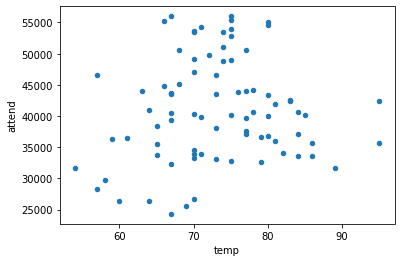

In [17]:
df.plot.scatter(x ='temp', y='attend') 
#Let's first see if there's any clear corr b/t temp and attendance

Looks like there is no strong or even medium linear temp corr with attendance. There may be a hump or 'sweet spot' in
attendance across the high-60's to upper 70's, and a declining attendance above 80 degrees F

array([[<AxesSubplot:title={'center':'temp'}>]], dtype=object)

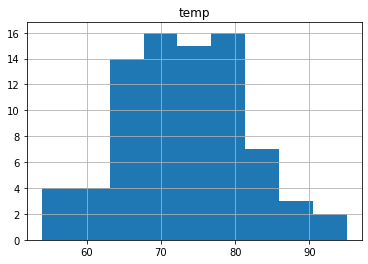

In [58]:
df.hist(column ='temp', bins=9) #simple histogram of binned temperatures


It appears above that the majority of games are played with temps between 63 and 86 degrees F

Manageent can not control the temp, but info like this might be useful to know what fans have to endure.

In Northern vs Southern climes, this dist might be very different across ball-parks and potentially drive different
offerings (Ice-cream vs hot chocolate or cider) as an inducement to fans during extreme high or low temps

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


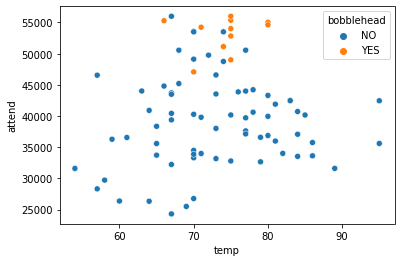

In [52]:
sns.scatterplot('temp', 'attend', data=df, hue='bobblehead') 
plt.show() # Let's see if there's a relation b/t the bobblehead promotion and attendance

Looks like there is a VERY strong corr with attendance and the bobblehead promotions. There are only 10 promotions, however
the avg attendance is clearly higher than without. Let's make a bar chart below to see.

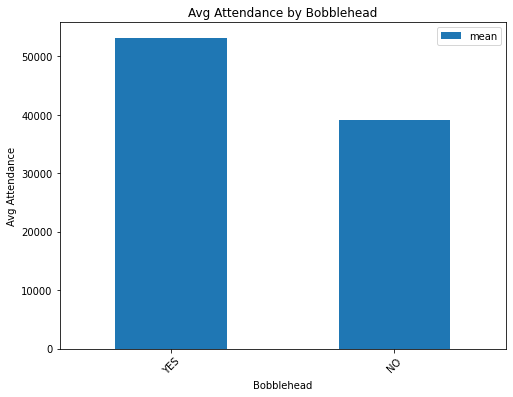

In [55]:
df_bobl = df.groupby('bobblehead').attend.agg(['mean']) # Let's look at avg attendance split by bobblehead y/n
df_bobl = df_bobl.sort_values(by = 'mean', axis=0, ascending=False) # and show it in descending order
ax = df_bobl.plot(kind='bar', figsize=(8, 6), title='Avg Attendance by Bobblehead', xlabel='Bobblehead', ylabel='Avg Attendance', rot=45)
plt.show() # This plots avg attendance with and without bobbleheads

So quick mental math (approx 52k/40k) shows that attendance is about 30% higher (on average) during a bobblehead promotion

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


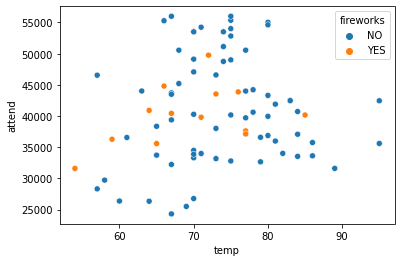

In [21]:
sns.scatterplot('temp', 'attend', data=df, hue='fireworks')
plt.show() # Let's see if there's a relation b/t fireworks after a game and attendance across temps

Doesn't look llike there much there - not a strong clustering high or low for fireworks...

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


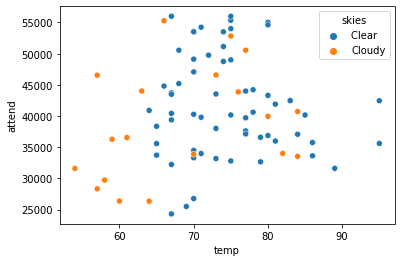

In [22]:
sns.scatterplot('temp', 'attend', data=df, hue='skies')
plt.show() # Let's see if there's a relation b/t sky conditions (Clear vs Cloudy) and attendance  across temps

Clear or cloudy skies looks to have no correlation with attendance. Also, not a variable they can control for anyways.

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


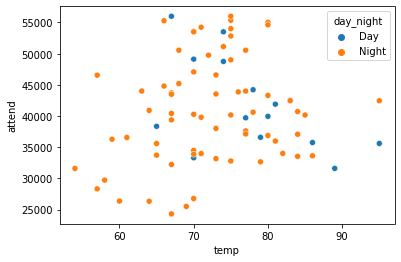

In [59]:
sns.scatterplot('temp', 'attend', data=df, hue='day_night')
plt.show() # Let's see if there's a relation b/t the day vs night and attendance across temps

Not a lot of Daytime games compared to night games. Looks like somewhat higher attendance than at night, but again, I would think that scheduling is mostly out of the control of the management

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


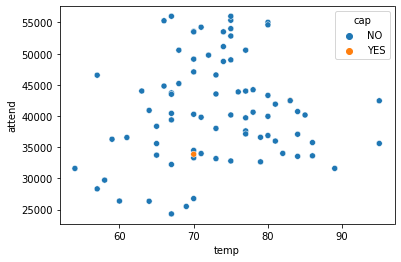

In [25]:
sns.scatterplot('temp', 'attend', data=df, hue='cap')
plt.show()  # Let's see if there's a relation b/t the cap night promo and attendance across temps

Clearly, one data point tells us virtually nothing here. Effect of cap night is unknown without more data (cap nights).

C:\Users\mersevim\AppData\Local\Continuum\miniconda3\envs\tensorflow-gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


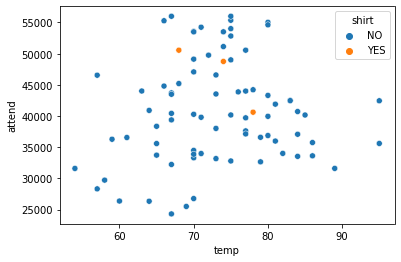

In [26]:
sns.scatterplot('temp', 'attend', data=df, hue='shirt')
plt.show()  #Let's see if there's a relation b/t the shirt promo and attendance across temps

Only marginally better than cap night data...however, so far, shirt night averages higher than the average of NOT shirt night.

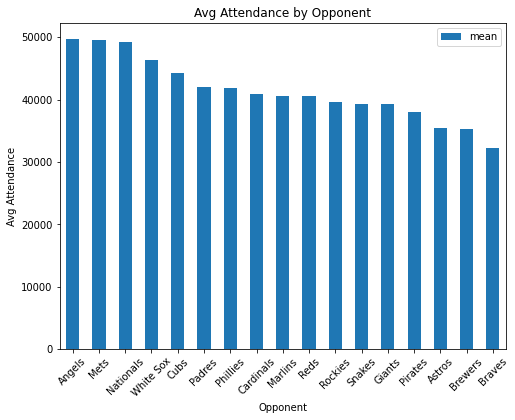

In [41]:
df_opp = df.groupby('opponent').attend.agg(['mean']) # Let's look at avg attendance by opponent
df_opp = df_opp.sort_values(by = 'mean', axis=0, ascending=False) # and show it in descending order...
ax = df_opp.plot(kind='bar', figsize=(8, 6), title='Avg Attendance by Opponent', xlabel='Opponent', ylabel='Avg Attendance', rot=45)
plt.show() # This plots avg attendance by opponent in descending order

The top 3 or 4 teams drew a significantly higher number of fans then the lowest three. Once again, probably not much 
control over scheduling who plays whom and when. However, perhaps do the promo when the lowest draw teams come to 
improve attendance. If there is a regional rivalry, perhaps fans come regardless.

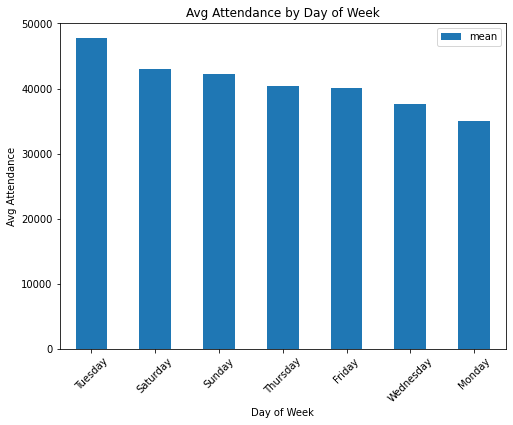

In [42]:
df_dow = df.groupby('day_of_week').attend.agg(['mean']) # Let's look at avg attendance by day of the week
df_dow = df_dow.sort_values(by = 'mean', axis=0, ascending=False) # and show it in descending order
ax = df_dow.plot(kind='bar', figsize=(8, 6), title='Avg Attendance by Day of Week', xlabel='Day of Week', ylabel='Avg Attendance', rot=45)
plt.show() # This plots avg attendance by day of the week in descending order

Looks like Tuesdays are the big draw. Mondays are the lowest. Again, if there's any flexibility in scheduling, move MOnday games to either Tuesday or Sunday.

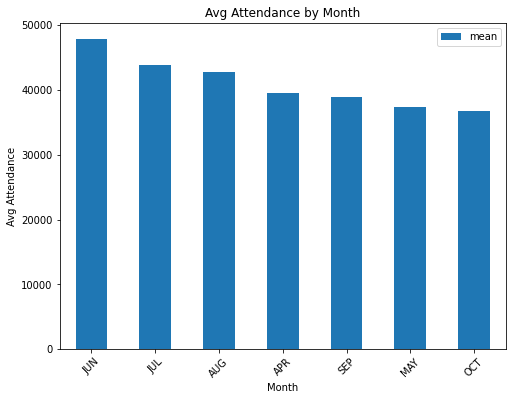

In [44]:
df_mth = df.groupby('month').attend.agg(['mean']) # Let's look at avg attendance by month
df_mth = df_mth.sort_values(by = 'mean', axis=0, ascending=False) # and show it in descending order...
ax = df_mth.plot(kind='bar', figsize=(8, 6), title='Avg Attendance by Month', xlabel='Month', ylabel='Avg Attendance', rot=45)
plt.show() # This plots avg attendance by month in descending order

Not surprisingly, the summer months have the hghest attendance when the weather is good and people have more time off.
I would suspect October can vary depending on how the home team is doing in their playoff prospects.

Conclusions:
Of the variables that management CAN control, the Bobble-head promotion is clearly the biggest driver of attendance.

Not enough data to tell for sure about shirts or caps...perhaps experiment by offering that more frequently to see if there is 
a relationship there.

Push Monday games forward of back a day if possible since Mondays look worst.

Utilize knowledge of weather to predict what fans may need.

There may be capacity constraints due to stadium size, so if nearing capacity, try the bobblehead promos (and/or other
suggestins) on the lower expected attendance games.